# 3-D Multiple Linear Regression Training 
<br> The spacial equation:$$\large y=w_1x_1+w_2x_2+b$$ 

In [1]:
import torch as pt

Defining Dataset in 3D and Trainloader:

In [2]:
from torch.utils.data import Dataset, DataLoader 

In [3]:
class Data2D(Dataset):
    def __init__(self):
        self.x=pt.zeros(20,2)
        self.x[:,0]=pt.arange(-1,1,0.1)
        self.x[:,1]=pt.arange(-1,1,0.1)
        self.w=pt.tensor([[1.0],[1.0]])
        self.f=pt.mm(self.x,self.w)+3 
        self.y=self.f+0.45*pt.randn(self.x.shape[0],1)
        self.len= self.x.shape[0]
        
        
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

In [4]:
dataset=Data2D()

In [6]:
dataset.x

tensor([[-1.0000, -1.0000],
        [-0.9000, -0.9000],
        [-0.8000, -0.8000],
        [-0.7000, -0.7000],
        [-0.6000, -0.6000],
        [-0.5000, -0.5000],
        [-0.4000, -0.4000],
        [-0.3000, -0.3000],
        [-0.2000, -0.2000],
        [-0.1000, -0.1000],
        [ 0.0000,  0.0000],
        [ 0.1000,  0.1000],
        [ 0.2000,  0.2000],
        [ 0.3000,  0.3000],
        [ 0.4000,  0.4000],
        [ 0.5000,  0.5000],
        [ 0.6000,  0.6000],
        [ 0.7000,  0.7000],
        [ 0.8000,  0.8000],
        [ 0.9000,  0.9000]])

Graphing it:

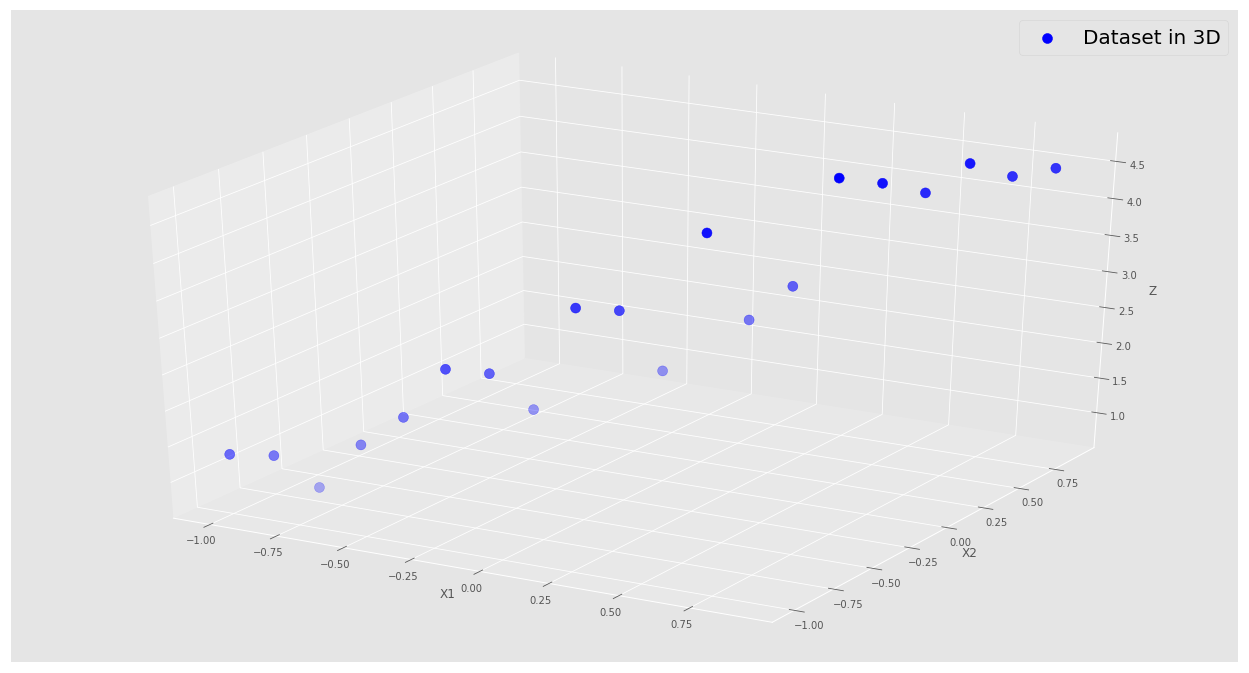

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 20
fig = plt.figure(figsize=(22,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=dataset.x[:,0].numpy(),ys=dataset.x[:,1].numpy(), zs=dataset.y.numpy(), 
           s=100,c='blue', depthshade=True,label='Dataset in 3D')
ax.legend()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')
plt.show()

* The strong the color is, the closer the point is.
* You must have a great abstract mind.


In [7]:
trainloader= DataLoader(dataset=dataset,batch_size=1)

In [8]:
for x,y in trainloader:
    print(x,y)

tensor([[-1., -1.]]) tensor([[0.9295]])
tensor([[-0.9000, -0.9000]]) tensor([[0.6019]])
tensor([[-0.8000, -0.8000]]) tensor([[1.5292]])
tensor([[-0.7000, -0.7000]]) tensor([[1.2222]])
tensor([[-0.6000, -0.6000]]) tensor([[1.4860]])
tensor([[-0.5000, -0.5000]]) tensor([[1.5549]])
tensor([[-0.4000, -0.4000]]) tensor([[2.2228]])
tensor([[-0.3000, -0.3000]]) tensor([[3.0793]])
tensor([[-0.2000, -0.2000]]) tensor([[2.3422]])
tensor([[-0.1000, -0.1000]]) tensor([[2.7484]])
tensor([[0., 0.]]) tensor([[2.5760]])
tensor([[0.1000, 0.1000]]) tensor([[3.5918]])
tensor([[0.2000, 0.2000]]) tensor([[3.9710]])
tensor([[0.3000, 0.3000]]) tensor([[3.6582]])
tensor([[0.4000, 0.4000]]) tensor([[4.3998]])
tensor([[0.5000, 0.5000]]) tensor([[4.0958]])
tensor([[0.6000, 0.6000]]) tensor([[3.3989]])
tensor([[0.7000, 0.7000]]) tensor([[5.1076]])
tensor([[0.8000, 0.8000]]) tensor([[5.0636]])
tensor([[0.9000, 0.9000]]) tensor([[4.9601]])


Defining the linear model:

In [7]:
import torch.nn as nn

In [8]:
class LR(nn.Module):
    def __init__(self,in_size,out_size):
        super(LR,self).__init__()
        self.linear=nn.Linear(in_size,out_size)
        
    def forward(self,x):
        out= self.linear(x)
        return out    

Defining the target function ***Mean Square Error*** on **Loss**:

In [9]:
criterion= nn.MSELoss()

Creating the program:

In [10]:
LOSS=[]
model=LR(2,1)
optimizer= pt.optim.SGD(model.parameters(),lr=0.01)
for epoch in range(20):
    for x,y in trainloader:
        yhat=model(x)
        loss=criterion(yhat,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    LOSS.append(float(loss))

Checking the best-set parameters: 

In [11]:
parameters=list(model.parameters())
print('w={0}\nb={1}'.format(parameters[0].data,parameters[1].data))

w=tensor([[1.1554, 0.8687]])
b=tensor([2.9389])


Graphing Loss:

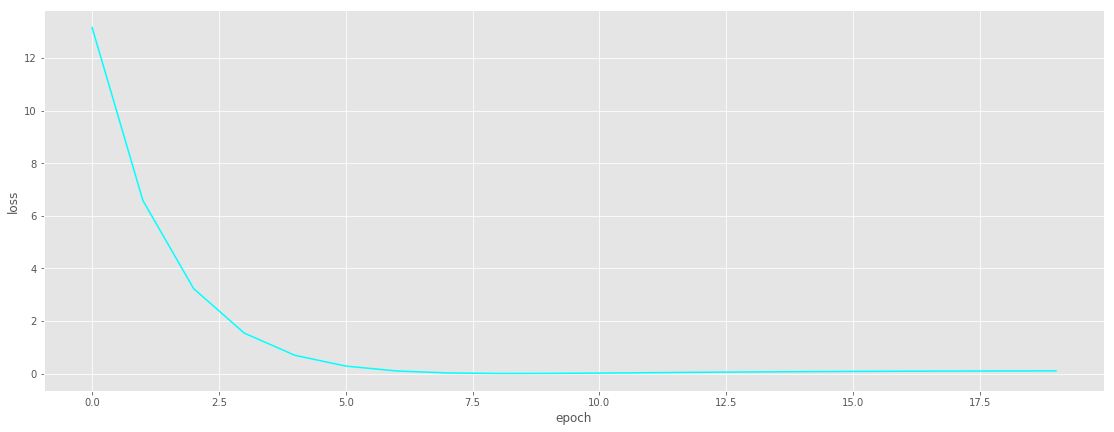

In [14]:
plt.figure(figsize=(19,7))
plt.style.use('ggplot')
plt.plot(LOSS,c='cyan')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()